# Exercises

In [4]:
%pip install pandas numpy statsmodels matplotlib

Note: you may need to restart the kernel to use updated packages.


## Exercise 1.1

This exercise aims at carrying out a simple regression analysis for the data set constructed by Frank Anscombe.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [5]:
anscombe = pd.read_csv('../data/anscombe.csv')
anscombe.head()

,Unnamed: 0,x1,x2,x3,x4,y1,y2,y3,y4
0,1,10,10,10,8,8.04,9.14,7.46,6.58
1,2,8,8,8,8,6.95,8.14,6.77,5.76
2,3,13,13,13,8,7.58,8.74,12.74,7.71
3,4,9,9,9,8,8.81,8.77,7.11,8.84
4,5,11,11,11,8,8.33,9.26,7.81,8.47


In [6]:
x1 = anscombe[['x1']]
y1 = anscombe[['y1']]

x_set = sm.add_constant(x1)

model = sm.OLS(y1, x_set).fit()
print(model.params)
model.summary()

const    3.000091
x1       0.500091
dtype: float64


/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 26 Oct 2025   Prob (F-statistic):            0.00217
Time:                        13:31:42   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.026       0.456       5.544
x1             0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [348]:
intercept = model.params.iloc[0]
slope = model.params.iloc[1]

y_pred = x1 * slope + intercept

r = y1 - y_pred # residuals
rss = np.sum(np.square(r), axis = 0) # residual sum of squares
rse = np.sqrt(rss / (r.shape[0] - 2)) # residual standard error = approximation of variance

print(f"Residuals Shape = {r.shape}")
print(f"RSS = {rss}")
print(f"RSE = {rse}")

Residuals Shape = (11, 2)
RSS = x1   0.00000
y1   0.00000
dtype: float64
RSE = x1   0.00000
y1   0.00000
dtype: float64


In [349]:
x = anscombe[['x1', 'x2', 'x3', 'x4']]
y = anscombe[['y1', 'y2', 'y3', 'y4']]

results = np.zeros((5, 4))
models = []
for i in range(4):
    xi = x.iloc[:, i]
    yi = y.iloc[:, i]

    x_set = sm.add_constant(xi)
    model = sm.OLS(yi, x_set).fit() # OLS = Ordinary Least Squares
    models.append(model)

    intercept = model.params.iloc[0]
    slope = model.params.iloc[1]
    y_pred = xi * slope + intercept

    r = yi - y_pred # residuals
    rss = np.sum(np.square(r), axis = 0) # residual sum of squares
    rse = np.sqrt(rss / (r.shape[0] - 2)) # residual standard error = approximation of variance

    xi_mean = np.mean(xi)
    xi_dist_sum = np.sum(np.square(xi - xi_mean))

    rse_squared = np.square(rse)
    slope_stderr = np.sqrt(rse_squared / xi_dist_sum)
    intercept_stderr = np.sqrt(rse_squared * (1 / xi.shape[0] + np.square(xi_mean) / xi_dist_sum))

    results[0, i] = intercept
    results[1, i] = slope
    results[2, i] = rse
    results[3, i] = intercept_stderr
    results[4, i] = slope_stderr

results_df = pd.DataFrame(
    results,
    columns=['model1', 'model2', 'model3', 'model4'],
    index=['intercept', 'slope', 'variance', 'intercept std. error', 'slope std. error']
    )

results_df

,model1,model2,model3,model4
intercept,3.00009,3.00091,3.00245,3.00173
slope,0.50009,0.50000,0.49973,0.49991
variance,1.23660,1.23721,1.23631,1.23570
intercept std. error,1.12475,1.12530,1.12448,1.12392
slope std. error,0.11791,0.11796,0.11788,0.11782


In [350]:
for i, model in enumerate(models):
    print(f"\n#################################### Model {i} #################################")
    print(model.summary())


#################################### Model 0 #################################
                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Mon, 22 Sep 2025   Prob (F-statistic):            0.00217
Time:                        23:50:02   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

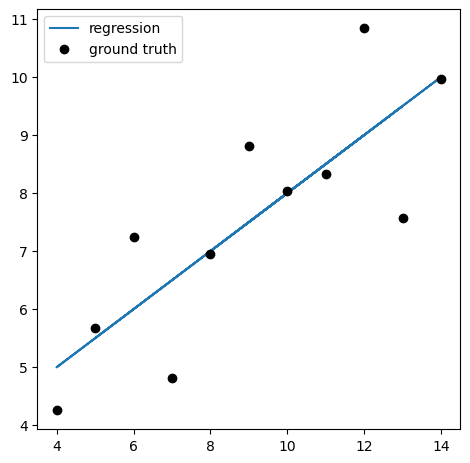

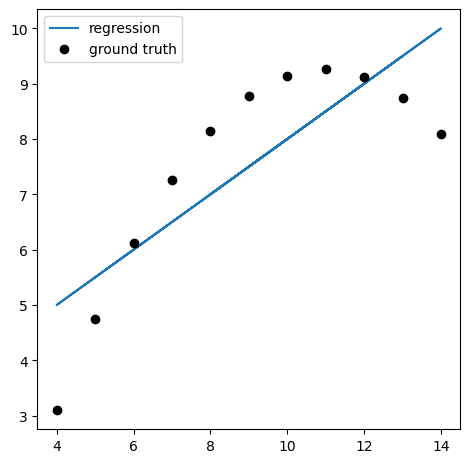

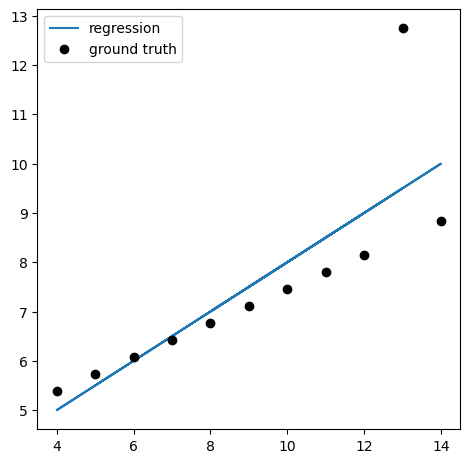

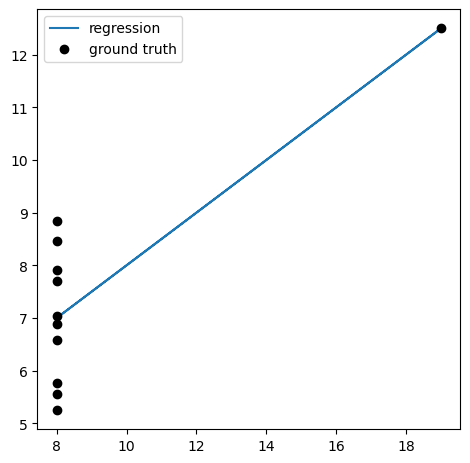

In [351]:
for i in range(4):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(2, 2, i + 1)

    intercept = results[0, i]
    slope = results[1, i]

    xi = x.iloc[:, i]
    yi = y.iloc[:, i]

    ax.plot(xi, xi * slope + intercept, label='regression')
    ax.plot(xi, yi, 'ok', label='ground truth')

    ax.legend(loc='best')

plt.show()

# Exercise 1.2

In [352]:
clocks = pd.read_csv('./../Data/antique_clocks.csv')
clocks

,Unnamed: 0,age,price
0,1,108,729
1,2,108,1055
2,3,111,785
3,4,111,1175
4,5,113,946
5,6,115,744
6,7,115,1080
7,8,117,1024
8,9,117,1152
9,10,126,1336


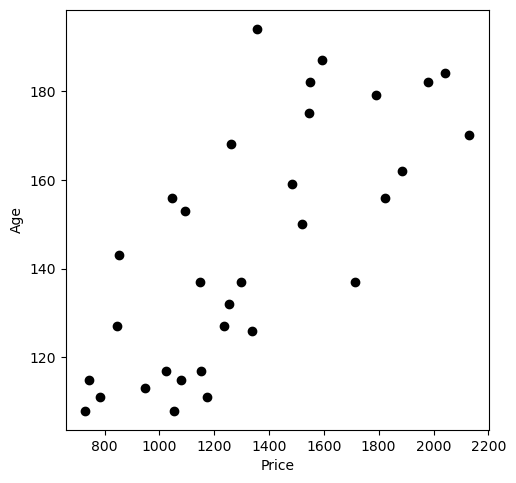

In [353]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(2, 2, 1)
ax.plot(clocks.price, clocks.age, 'ok')
ax.set_xlabel('Price')
ax.set_ylabel('Age')
plt.show()

In [354]:
x_set = sm.add_constant(clocks.price)
y = clocks.age

model = sm.OLS(y, x_set).fit()
model.params

const   77.40366
price    0.05089
dtype: float64

In [355]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     34.27
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           2.10e-06
Time:                        23:50:02   Log-Likelihood:                -138.64
No. Observations:                  32   AIC:                             281.3
Df Residuals:                      30   BIC:                             284.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.4037     12.016      6.442      0.000      52.864     101.944
price          0.0509      0.009      5.854      0.000       0.033       0.069
==============================================================================
Omnibus:                        2.513   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.239
Skew:                           0.616   Prob(JB):                        0.326
Kurtosis:                       2.600   Cond. No.                     4.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

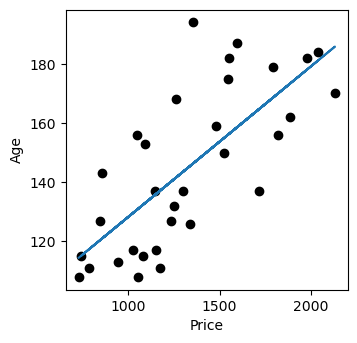

In [356]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2, 2, 1)

ax.plot(clocks.price, clocks.age, 'ok')
ax.plot(clocks.price, clocks.price * model.params.iloc[1] + model.params.iloc[0])

ax.set_xlabel('Price')
ax.set_ylabel('Age')
plt.show()

Even though the line seem to be placed correctly, there is a lot of variance. That said, it doesn't seem to be a good idea to use a linear model to describe the relationship between the age and the price of a clock.

# Exercise 1.3

In [357]:
windmill = pd.read_csv('./../Data/windmill.csv')
windmill

,wind_speed,current
0,11.18707,1.58200
1,13.42449,1.82200
2,7.60721,1.05700
3,6.04102,0.50000
4,22.37414,2.23600
5,21.70292,2.38600
6,21.36731,2.29400
7,6.82411,0.55800
8,18.23493,2.16600
9,13.87197,1.86600


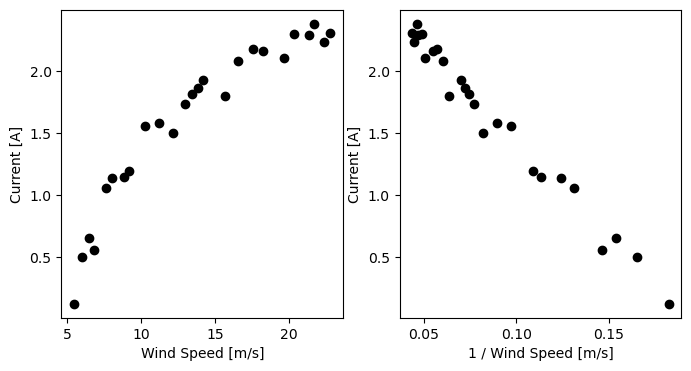

In [358]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1, 2, 1)
ax.plot(windmill.wind_speed, windmill.current, 'ok')
ax.set_xlabel('Wind Speed [m/s]')
ax.set_ylabel('Current [A]')

ax = fig.add_subplot(1, 2, 2)
ax.plot(1. / windmill.wind_speed, windmill.current, 'ok')
ax.set_xlabel('1 / Wind Speed [m/s]')
ax.set_ylabel('Current [A]')

plt.show()

The relationship of current vs. 1 / wind-speed is pretty much the inversion of current vs wind-speed.

In [359]:
x_set = sm.add_constant(1 / windmill.wind_speed)

model = sm.OLS(windmill.current, x_set).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                current   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1128.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           4.74e-21
Time:                        23:50:02   Log-Likelihood:                 24.635
No. Observations:                  25   AIC:                            -45.27
Df Residuals:                      23   BIC:                            -42.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9789      0.045     66.341      0.000       2.886       3.072
wind_speed   -15.5155      0.462    -33.592      0.000     -16.471     -14.560
==============================================================================
Omnibus:                        2.768   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.287
Skew:                          -0.720   Prob(JB):                        0.319
Kurtosis:                       2.646   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
model.params

const          2.97886
wind_speed   -15.51546
dtype: float64

In [361]:
model.conf_int(alpha = 0.01)

,0,1
const,2.85280,3.10492
wind_speed,-16.81210,-14.21881


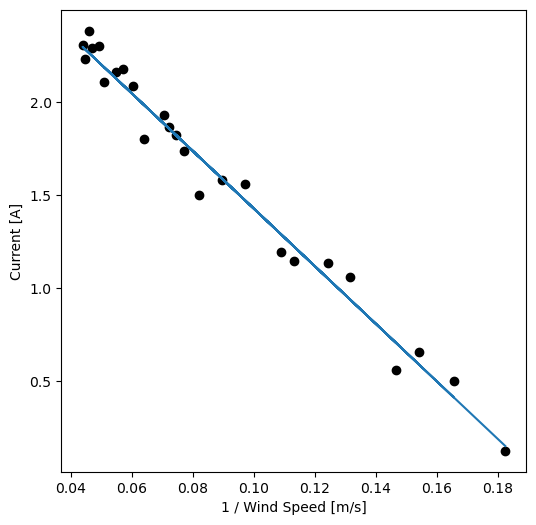

In [362]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(1, 1, 1)
ax.plot(1. / windmill.wind_speed, windmill.current, 'ok')
ax.plot(1. / windmill.wind_speed, 1 / windmill.wind_speed * model.params.iloc[1] + model.params.iloc[0])
ax.set_xlabel('1 / Wind Speed [m/s]')
ax.set_ylabel('Current [A]')

plt.show()

In [363]:
x0 = [1/1,1/10]
x0 = sm.add_constant(x0)

model.get_prediction(x0).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-12.53660,0.42154,-13.40861,-11.66458,-13.43011,-11.64309
1,1.42731,0.01960,1.38677,1.46786,1.22833,1.62630
